In [4]:
from src.model.pl_modules import RacingF1Detector
from src.data.datasets import RacingF1Dataset
from src.data.pl_data_modules import RacingF1DataModule
from src.data.custom_transforms import CustomRescale
from pytorch_lightning import Trainer
from src.utils import draw_bounding_box, tensor_to_image
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torchvision import transforms

import torch
import torchvision
import pytorch_lightning as pl

In [11]:
augmentation = transforms.Compose([
	CustomRescale((350, 350)),
])

dataset = RacingF1Dataset(['dataset/racing-1'], transforms=augmentation)

trainset, testset, valset = dataset.random_split(0.6, 0.25, 0.15, torch.Generator().manual_seed(42))

In [12]:
batch_size = 32

data_module = pl.LightningDataModule().from_datasets(train_dataset=trainset,
													 test_dataset=testset,
													 val_dataset=valset,
													 batch_size=batch_size)

In [7]:
sample = trainset[432]
image = tensor_to_image(sample['img'])
image_with_bounding_box = draw_bounding_box(image, sample['bounding_box'])

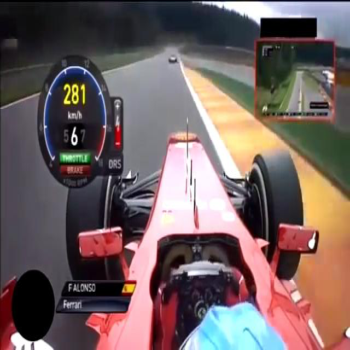

In [8]:
image

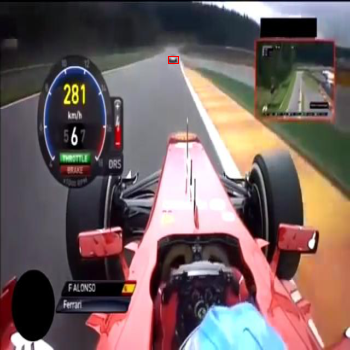

In [9]:
image_with_bounding_box

In [10]:
hparams = { "kernel_size": 3 }
detector = RacingF1Detector(hparams)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/andrea/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:41<00:00, 4.06MB/s] 


In [12]:
logger = TensorBoardLogger('tb_logs', name='racing_detector')

In [13]:
trainer = Trainer(gpus=0, max_epochs=1, checkpoint_callback=False, logger=logger)

/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [14]:
trainer.fit(detector, datamodule=data_module)

/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:118: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")

  | Name          | Type       | Params
---------------------------------------------
0 | loss_function | MSELoss    | 0     
1 | model         | FasterRCNN | 41.3 M
---------------------------------------------
41.1 M    Trainable params
222 K     Non-trainable params
41.3 M    Total params
165.238   Total estimated model params size (MB)
/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the 

Epoch 0:   0%|          | 0/31 [00:00<?, ?it/s] 

/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/home/andrea/miniconda3/envs/cv-project/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1635217160634/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


RuntimeError: Couldn't load custom C++ ops. This can happen if your PyTorch and torchvision versions are incompatible, or if you had errors while compiling torchvision from source. For further information on the compatible versions, check https://github.com/pytorch/vision#installation for the compatibility matrix. Please check your PyTorch version with torch.__version__ and your torchvision version with torchvision.__version__ and verify if they are compatible, and if not please reinstall torchvision so that it matches your PyTorch install.